**Nombre alumno:** Gemma del Val

# Proyecto *Pump-it-up*

## ¿Qué bombas funcionan y cuáles no?

### Introducción

Actualmente, la población de Tanzania tiene un acceso muy deficiente al agua potable. Aproximadamente el 47% de sus ciudadanos no tienen acceso a esta. Más de $1.4 millones de dólares en ayuda exterior han sido donados al país en un intento de ayudar a solucionar la crisis del agua dulce. Por otro lado, el gobierno de Tanzania no está poniendo una solución a este problema. Una buena proporción de las bombas de agua o no funcionan o apenas lo hacen y necesitan reparación. Muchas personas deben beber agua sucia, llena de patógenos, o caminar varios kilómetros sólo para llegar hasta la bomba de agua subterránea funcional más cercana.

### Objetivo

Haciendo uso de los datos cargados en la web de Taarifa y el Ministerio de Tanzania del Agua, nuestro objetivo es predecir qué bombas funcionan, cuáles no y cuáles necesitan una reparación. Entender cuáles fallarán es importante por los siguientes motivos: 

- Predecir la funcionalidad de todas las bombas de agua subterránea que se encuentran en el territorio con modelos precisos, podría ayudar a ahorrarle al gobierno de Tanzania mucho tiempo y dinero.
- Estos modelos pueden ayudar a reducir el costo de inspección de cada bomba de agua.
- El gobierno puede usar este estudio para saber exactamente cuál es la situación del bombeo de su agua.


El presente trabajo va a estar dividido en tres partes: siendo la primera el Análisis Exploratorio de los Datos, la segunda el Preprocesado de los mismos y la tercera la Selección del Modelo y Entrega.

# I. Análisis Exploratorio de los Datos

## 1. Descripción de los datos
Comenzamos con una pequeña descripción de los datos con los que vamos a trabajar:
### 1.1 Características

* amount_tsh - Cantidad de agua para bombear
* date_recorded - Fecha de inserción de datos
* funder - Quién fundó el pozo
* gps_height - Altitud del pozo
* installer - Organización que lo instaló
* longitude - Coordenadas GPS
* latitude - Coordenadas GPS
* wpt_name - Nombre de la bomba (si es que lo tiene)
* num_private - Número
* basin - Cuenca geográfica
* subvillage - Localización geográfica
* region - Localización geográfica
* region_code - Localización geográfica (en código)
* district_code - Localización geográfica (en código)
* lga - Localización geográfica
* ward - Localización geográfica
* population - Población junto al pozo
* public_meeting - Verdadero/Falso
* recorded_by - Grupo que introduce estos datos
* scheme_management - Quién gestiona la bomba
* scheme_name - Quién maneja la bomba
* permit - Si la bomba está permitida o no
* construction_year - Año de construcción de la bomba
* extraction_type - Tipo de extracción de la bomba
* extraction_type_group - Tipo de extracción de la bomba
* extraction_type_class - Tipo de extracción de la bomba
* management - Cómo se gestiona la bomba
* management_group - Cómo se gestiona la bomba
* payment - Coste del agua
* payment_type - Coste del agua
* water_quality - Calidad del agua
* quality_group - Calidad del agua
* quantity - Cantidad de agua
* quantity_group - Cantidad de agua
* source - Fuente del agua
* source_type - Fuente del agua
* source_class - Fuente del agua
* waterpoint_type - Tipo de bomba
* waterpoint_type_group - Tipo de bomba

### 1.2 Etiquetas

* **functional** - La bomba funciona y no es necesario repararla
* **functional needs repair** - Funciona, pero necesita reparación
* **non functional** - La bomba de agua no funciona

## 2. Importación de librerías y datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
print("Setup Complete")

Setup Complete


In [2]:
pylab.rcParams["figure.figsize"] = (14,8)

In [3]:
X_train = pd.read_csv("Training_values.csv")
y_train = pd.read_csv("Training_labels.csv")
X_test = pd.read_csv("Test_values.csv")

train_df = X_train.merge(y_train, how='outer', left_index=True, right_index=True)

## 3. Estadística Descriptiva

In [4]:
train_df.head()

,id_x,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_y,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [5]:
train_df.describe()

,id_x,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,id_y
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,37115.131768
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,21453.128371
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,18519.750000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,37061.500000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,55656.500000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,74247.000000


Con estas tablas podemos comprobar la distribución de los datos. Observamos que hay varios valores faltantes para los *min* de las variables. Esto se refiere a la existencia de valores *missing* que tendremos que tratar antes de seguir con los modelos.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_x                   59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

El *set* de *train* contiene 59400 observaciones y 41 columnas. 
La columna *status_group* muestra la etiqueta para cada bomba, las otras 40 variables corresponden a las características, de las cuales 10 son numéricas y el resto categóricas. 
Comenzaremos investigando las numéricas.

## 4. Primera estimación de la exactitud o *accuracy*

A continuación observaremos la distribución de la variable objetivo *label* en *train* que nos servirá para los cálculos de nuestras predicciones.

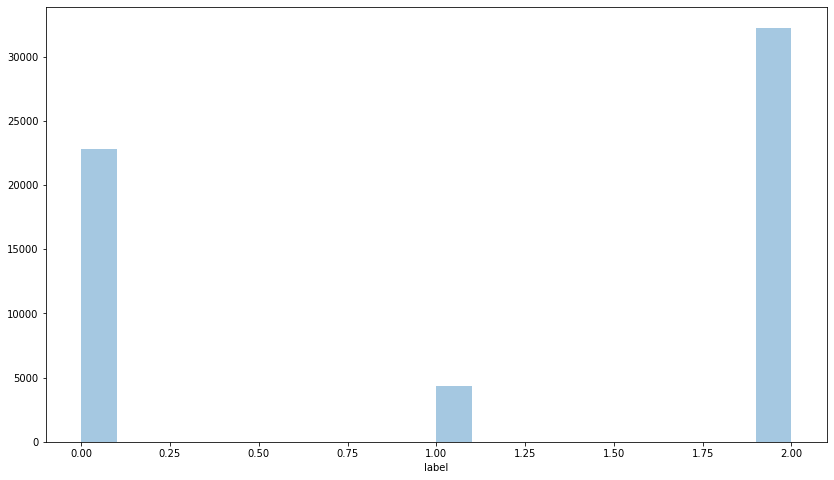

In [7]:
label_dict = {"functional":2,"functional needs repair":1,"non functional":0}
train_df["label"] = train_df["status_group"].map(label_dict)
sns.distplot(train_df["label"],kde=False)

In [80]:
majority_class = train_df['status_group'].mode()[0]
print("The most frequent label is", majority_class)

y_prelim_pred = np.full(shape=train_df['status_group'].shape, fill_value=majority_class)
accuracy_score(train_df['status_group'], y_prelim_pred)

The most frequent label is functional


0.543080808080808

Significa que podemos empezar a hacer una estimación del 54.31% de probabilidad de que una bomba cualquiera de esta base de datos funcione bien (es decir, sea *functional*). Esto nos sirve de base para futuras predicciones.

Dado que nuestra variable objetivo es discreta, necesitaremos un algoritmo de clasificación supervisada, que son los que aplicaremos más adelante.

## 5. Variables numéricas

In [9]:
numerical_vars = [col for col in train_df.columns if 
                train_df[col].dtype in ['int64', 'float64']]

### 5.1 *construction_year*

Vamos a realizar un gráfico de esta variable y el número de bombas construidas en ese año.

Text(0, 0.5, 'Number of pumps constructed')

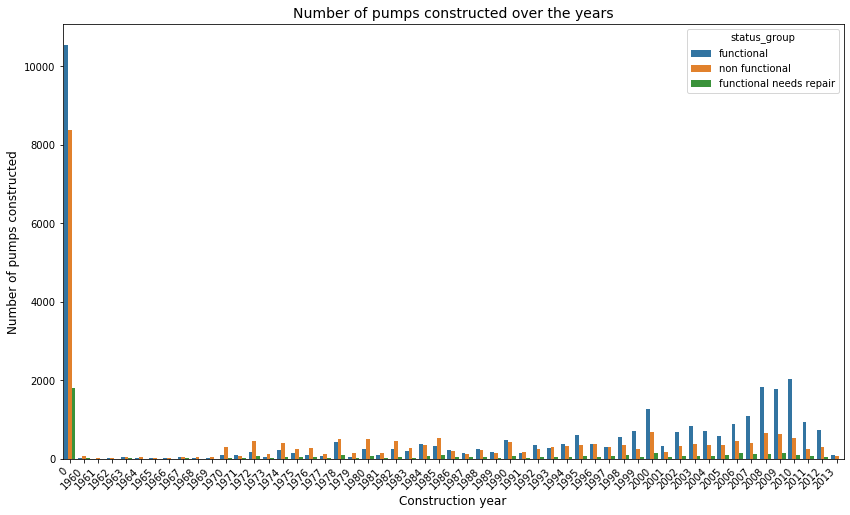

In [10]:
sns.countplot(x=train_df["construction_year"],hue=train_df["status_group"])
plt.xticks(rotation=45, 
    horizontalalignment='right')
plt.title("Number of pumps constructed over the years", fontsize=14)
plt.xlabel("Construction year", fontsize=12)
plt.ylabel("Number of pumps constructed", fontsize=12)

Observamos que la mayoría de las que fueron construidas en 1985 no funcionan, mientras que las más recientes sí. Esto significa que este atributo puede ser muy útil a la hora de realizar las predicciones en nuestro modelo. El número de bombas que necesitan una reparación no parece muy elevado y sobretodo se mantiene estable con el paso de los años. Las filas que tienen un cero como año de construcción deberían revisarse.

### 5.2 *amount_tsh*

Esta variable muestra la cantidad de agua que queda en un pozo. Podría ser útil a la hora de predecir si su respectiva bomba funciona o no.

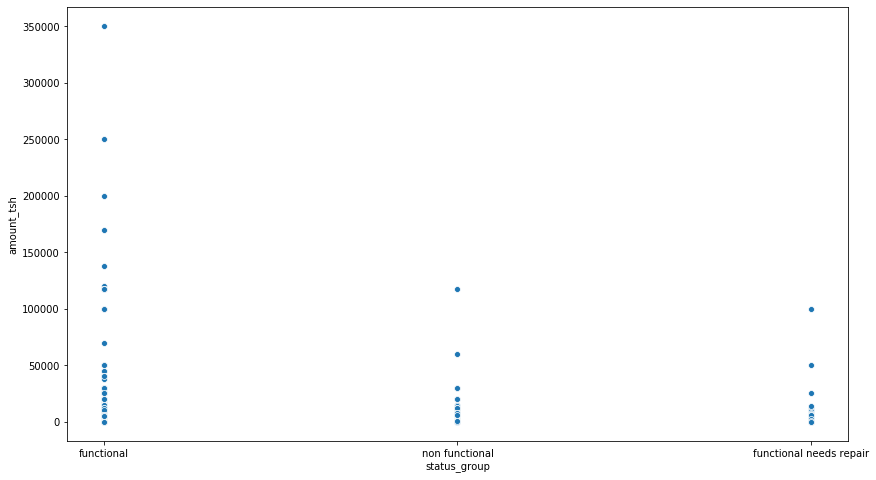

In [11]:
sns.scatterplot(y=train_df["amount_tsh"],x=train_df["status_group"])

Si *amount_tsh* es mayor de 150000, lo más probable es que la bomba funcione.

### 5.3 Distribución de variables numéricas

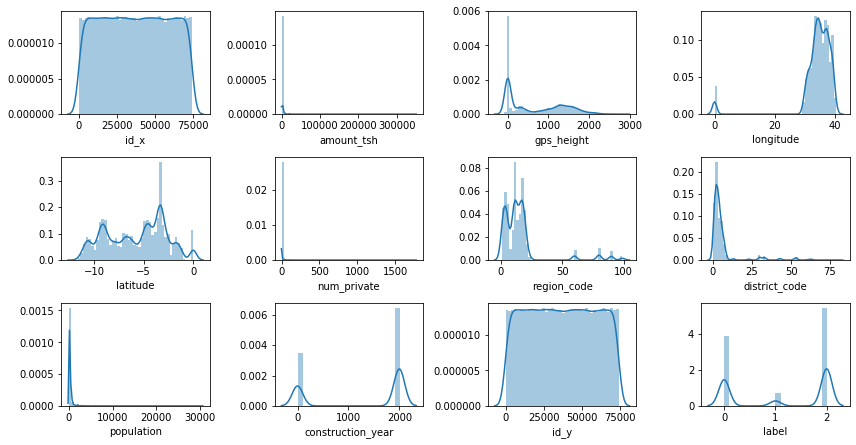

In [12]:
fig = plt.figure(figsize=(12,18))
sns.distributions._has_statsmodels=False
for i in range(len(numerical_vars)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(train_df[numerical_vars].iloc[:,i].dropna())
    plt.xlabel(numerical_vars[i])

plt.tight_layout()
plt.show()

### 5.4 Valores atípicos

La visualización de los datos hace sospechar la posible existencia de valores atípicos o *outliers* en nuestros datos:

#### 5.4.1 Análisis univariante: diagramas de caja para atributos numéricos

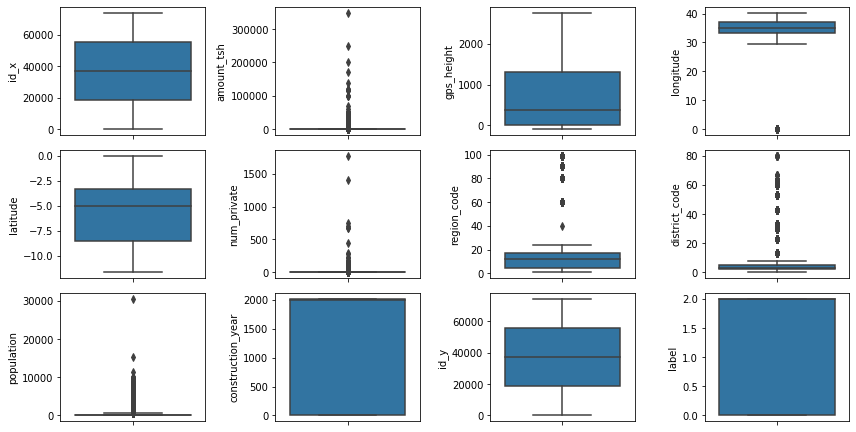

In [13]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(numerical_vars)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=train_df[numerical_vars].iloc[:,i])

plt.tight_layout()
plt.show()

Encontramos, por ejemplo, el siguiente: 
- *population* > 200000.

#### 5.4.2 Análisis de datos bivariantes: diagramas de dispersión para el objetivo frente a los atributos numéricos

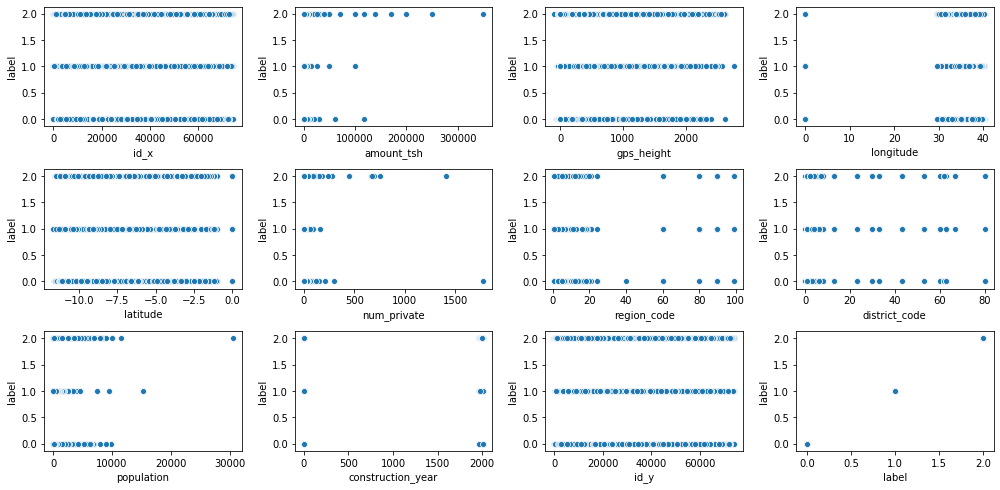

In [14]:
f = plt.figure(figsize=(14,20))

for i in range(len(numerical_vars)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(train_df[numerical_vars].iloc[:,i], train_df["label"])
    
plt.tight_layout()
plt.show()

Observamos los siguientes:
- *amount_tsh* (> 200000) 
- *population* (> 13000)

### 5.5 Correlación entre variables

La correlación entre variables se muestra en el presente apartado.
Cabe destacar que esta puede verse afectada por la presencia de *outliers*.

Para poder utilizar la regresión lineal es necesario quitar las variables que estén altamente correlacionadas para así mejorar el modelo.

A continuación se presenta el gráfico de correlación:

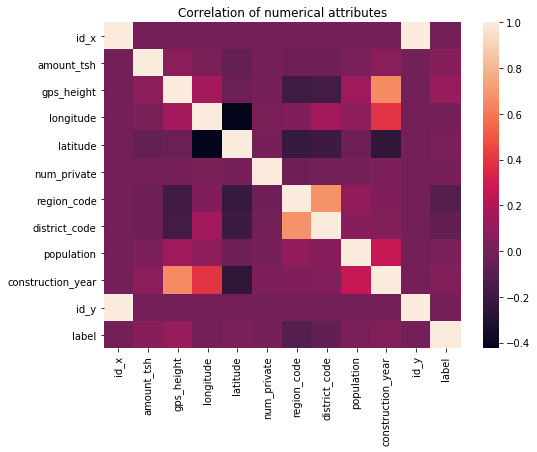

In [15]:
correlation = train_df.corr()

f, ax = plt.subplots(figsize=(8,6))
plt.title('Correlation of numerical attributes', size=12)
sns.heatmap(correlation)

Observamos que la correlación entre *district_code* y *region_code* es bastante elevada. Por lo que es posible que se deba eliminar una de las dos.

La correlación existente entre *construction_year* y *gps_height* también es elevada, pero estas dos variables no tienen una relación tan evidente, por lo que lo investigaremos más en profundidad antes de tomar cualquier decisión.

En relación a *label*, las variables más correlacionadas son:

In [16]:
correlation['label'].sort_values(ascending=False)

label                1.000000
gps_height           0.114029
amount_tsh           0.053702
construction_year    0.043342
population           0.017759
latitude             0.014547
num_private          0.005021
id_y                -0.004049
id_x                -0.004049
longitude           -0.004366
district_code       -0.065687
region_code         -0.108640
Name: label, dtype: float64

La correlación lineal negativa de *region_code* con la variable objetivo es más alta que la de *district_code*. Mantenemos la que la tiene más elevada.

La correlación lineal con la variable objetivo es bastante baja en todas las variables pero puede significar que exista una correlación no lineal.

### 5.6 Valores faltantes en las variables numéricas

In [17]:
train_df[numerical_vars].isna().sum().sort_values(ascending=False)

label                0
id_y                 0
construction_year    0
population           0
district_code        0
region_code          0
num_private          0
latitude             0
longitude            0
gps_height           0
amount_tsh           0
id_x                 0
dtype: int64

##### Population

In [18]:
len(train_df.population[train_df.population == 0])

21381

Una posible solución al problema de los valores faltantes podría ser transformarla en categórica.

## 6. Variables categóricas

In [19]:
cat_vars = train_df.select_dtypes(include='object').columns
print(cat_vars)

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


### 6.1 Valores faltantes en las variables categóricas

In [20]:
train_df[cat_vars].isna().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
status_group                 0
extraction_type              0
wpt_name                     0
basin                        0
region                       0
lga                          0
ward                         0
recorded_by                  0
extraction_type_group        0
waterpoint_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
date_recorded                0
dtype: int64

Visualizamos las categorías de *scheme_management*:

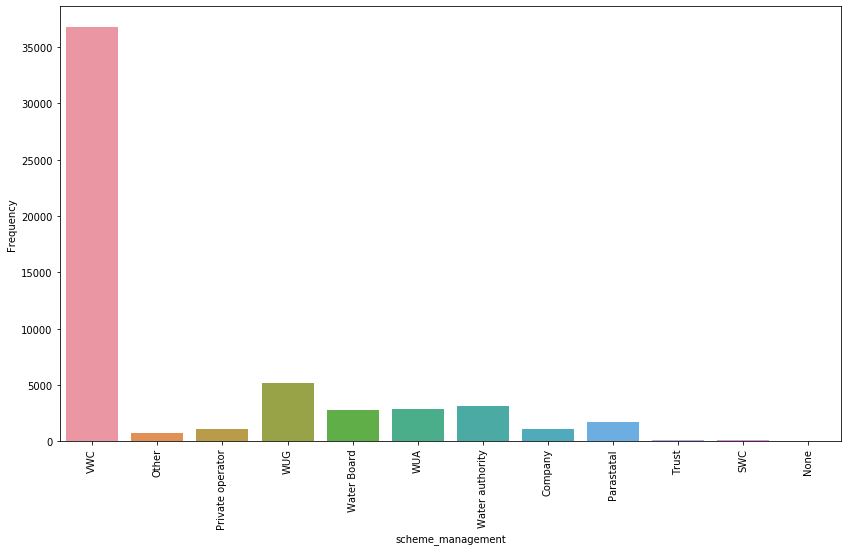

In [21]:
sns.countplot(x='scheme_management', data=train_df)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

## 7. Exportamos los datos tras el análisis

In [22]:
train_df.to_csv("train_df_after_EDA.csv", index=False)
X_test.to_csv("X_test_after_EDA.csv", index=False)

# II. Preprocesado de datos
En el presente apartado vamos a ocuparnos del preprocesado de datos, es decir, prepararlos y optimizarlos para hacer los futuros *tests* con los modelos de *Machine Learning*.
## 1. Importación de liberías y datos

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
print("Setup Complete")

Setup Complete


A continuación cargamos los datos después del análisis:

In [24]:
train_df = pd.read_csv("train_df_after_EDA.csv")
X_test = pd.read_csv("X_test_after_EDA.csv")

## 2. Extracción de variables similares

Los siguientes atributos

- *(extraction_type, extraction_type_group, extraction_type_class),*
- *(payment, payment_type),*
- *(water_quality, quality_group),*
- *(source, source_class),*
- *(subvillage, region, region_code, district_code, lga, ward),*
- *(waterpoint_type, waterpoint_type_group)*
- *(scheme_name, scheme_management)*

aportan una información muy similar, que indica que entre ellos hay una correlación elevada. Dejándolos, arriesgaríamos un sobreajuste.

Además:

- *num_private* consiste en 99% de ceros y no tiene una descripción clara, así que no podemos interpretarlo
- *wpt_name* no es muy informativa ya que tiene menos valores que el número de observaciones

Quitaremos una variable entre *district_code* y *region_code* por existir una elevada correlación entre ellas. Elegiremos la que tenga una correlación más elevada con la variable objetivo. La correlación negativa con la objetivo de *region_code* es más alta que la de *district_code*.

In [25]:
train_df = train_df.drop(['installer','management_group','status_group','id_x','id_y', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'],axis=1)
X_test = X_test.drop(['installer','management_group','id', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'],axis=1)

In [26]:
train_df.head()

,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,basin,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type,label
0,6000.0,2011-03-14,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,109,True,VWC,False,1999,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,2
1,0.0,2013-03-06,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,280,NaN,Other,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2
2,25.0,2013-02-25,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,250,True,VWC,True,2009,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple,2
3,0.0,2013-01-28,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,True,VWC,True,1986,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,0
4,0.0,2011-07-13,Action In A,0,31.130847,-1.825359,Lake Victoria,18,1,0,True,NaN,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2


## 3. Valores faltantes

In [27]:
train_df["scheme_management"].fillna("unknown", inplace = True)
train_df["public_meeting"].fillna("unknown", inplace = True)
train_df["permit"].fillna("unknown", inplace = True)
train_df["funder"].fillna("unknown", inplace = True)

X_test["scheme_management"].fillna("unknown", inplace = True)
X_test["public_meeting"].fillna("unknown", inplace = True)
X_test["permit"].fillna("unknown", inplace = True)
X_test["funder"].fillna("unknown", inplace = True)

In [28]:
X_test.isna().sum().sort_values(ascending=False)

waterpoint_type      0
source_class         0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region_code          0
district_code        0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
quality_group        0
quantity_group       0
source               0
amount_tsh           0
dtype: int64

## 4. Codificación ordinal de datos categóricos
Se decide utilizar esta metodología para evitar crear demasiadas columnas y dar algo de lógica al modelo a la hora de evaluar las características. Por ejemplo, en la variable *quality_group*, cuanto mayor sea la categoría, mejor la calidad del agua y más probable que la bomba funcione de manera correcta.

### 4.1 *quality_group*

In [36]:
train_df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [37]:
order_dict_quality = {"good":3,"salty":2,"milky":2,"colored":2,"fluoride":2,"unknown":1}
train_df["quality_group_code"] = [order_dict_quality[item] for item in train_df.quality_group]
del train_df["quality_group"]

X_test["quality_group_code"] = [order_dict_quality[item] for item in X_test.quality_group]
del X_test["quality_group"]

### 4.2 *quantity_group*

In [38]:
train_df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [39]:
order_dict_quantity = {"enough":3,"insufficient":2,"dry":2,"seasonal":2,"unknown":1}
train_df["quantity_group_code"] = [order_dict_quantity[item] for item in train_df.quantity_group] 
del train_df["quantity_group"]

X_test["quantity_group_code"] = [order_dict_quantity[item] for item in X_test.quantity_group] 
del X_test["quantity_group"]

### 4.3 *payment_type*

In [40]:
train_df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [41]:
order_dict_payment = {"monthly":4,"annually":4,"on failure":3,"per bucket":3,"never pay":2,"unknown":1,"other":1}
train_df["payment_code"] = [order_dict_payment[item] for item in train_df.payment_type] 
del train_df["payment_type"]

X_test["payment_code"] = [order_dict_payment[item] for item in X_test.payment_type] 
del X_test["payment_type"]

### 4.4 *public_meeting*

In [42]:
train_df.public_meeting.value_counts()

True       51011
False       5055
unknown     3334
Name: public_meeting, dtype: int64

In [43]:
order_dict_pub_meet = {True:2,False:1,"unknown":0}
train_df["public_meeting_code"] = [order_dict_pub_meet[item] for item in train_df.public_meeting] 
del train_df["public_meeting"]

X_test["public_meeting_code"] = [order_dict_pub_meet[item] for item in X_test.public_meeting] 
del X_test["public_meeting"]

### 4.5 *permit*

In [44]:
train_df.permit.value_counts()

True       38852
False      17492
unknown     3056
Name: permit, dtype: int64

In [45]:
order_dict_permit = {True:2,False:1,"unknown":0}
train_df["permit_code"] = [order_dict_pub_meet[item] for item in train_df.permit] 
del train_df["permit"]

X_test["permit_code"] = [order_dict_pub_meet[item] for item in X_test.permit] 
del X_test["permit"]

## 5. Más mejoras al modelo

A continuación crearemos variables nuevas (basadas en las características de nuestro *dataset*) que describirán de una forma más óptima a la objetivo.

### 5.1 *amount_tsh*
Después de nuestro Análisis Exploratorio de los datos hemos definido una condición para separar las bombas que funcionan de las que no. Vamos a proceder a crear una nueva variable binaria que refleje esta información.

In [46]:
train_df.loc[train_df['amount_tsh'] < 200000, 'amount_tsh'] = 0
train_df.loc[train_df['amount_tsh'] >= 200000, 'amount_tsh'] = 1

X_test.loc[train_df['amount_tsh'] < 200000, 'amount_tsh'] = 0
X_test.loc[train_df['amount_tsh'] >= 200000, 'amount_tsh'] = 1

### 5.2 *construction_year*
A continuación transformamos *construction_year* en una variable categórica que contenga las siguientes décadas de años: '60s', '70s', '80s', '90s, '00s', '10s' y 'unknown' para los años desconocidos.

In [47]:
def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train_df['construction_year'] = train_df.apply(lambda row: construction_wrangler(row), axis=1)
X_test['construction_year'] = X_test.apply(lambda row: construction_wrangler(row), axis=1)

### 5.3 *date_recorded*
Calcularemos el número de días que indica la variable *date_recorded* en el cual se obtuvieron los datos para una bomba en concreto, hasta la fecha más reciente del *dataset*. La idea es que es más probable que los guardados en nuestros datos en una época más reciente funcionen correctamente.
Iniciaremos convirtiendo la columna en una de tipo *datetime*.

In [48]:
train_df.date_recorded = pd.to_datetime(train_df.date_recorded)
X_test.date_recorded = pd.to_datetime(X_test.date_recorded)

train_df.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

Los datos más recientes son del 12 de marzo de 2013.

In [49]:
train_df['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(train_df.date_recorded)
train_df['days_since_recorded'] = train_df['days_since_recorded'].astype('timedelta64[D]').astype(int)

X_test['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(X_test.date_recorded)
X_test['days_since_recorded'] = X_test['days_since_recorded'].astype('timedelta64[D]').astype(int)

/Library/Python/3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/Library/Python/3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [50]:
train_df['days_since_recorded']

0         995
1         272
2         281
3         309
4         874
         ... 
59395     214
59396     941
59397     967
59398    1001
59399     986
Name: days_since_recorded, Length: 59400, dtype: int64

In [51]:
train_df = train_df.drop("date_recorded",axis=1)
X_test = X_test.drop("date_recorded",axis=1)

In [52]:
train_df.shape

(59400, 23)

In [53]:
X_test.shape

(14850, 22)

## 6. Codificación de tipo *One-Hot* para las variables categóricas

Para variables categóricas donde no existe una relación de orden, la codificación mediante enteros no suele ser adecuada. En estos casos, se puede aplicar una codificación especial donde se agrega una nueva variable binaria (con valores verdadero o falso) para cada valor de categoría posible.
La codificación *One-Hot* es un método para etiquetar a qué clase pertenecen los datos y la idea es asignar 0 a toda la dimensión, excepto 1 para la clase a la que pertenecen los datos.

In [54]:
cat_vars = train_df.select_dtypes(include='object').columns
print(cat_vars)
len(cat_vars)

Index(['funder', 'basin', 'scheme_management', 'construction_year',
       'extraction_type', 'management', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object')


9

In [55]:
from sklearn.preprocessing import OneHotEncoder

# Aplicamos el método One-Hot-Encoder para cada columna con datos de tipo categórico
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df[cat_vars])).astype(np.int64)
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[cat_vars])).astype(np.int64)

# El método quita el index, se vuelve a poner
OH_cols_train.index = train_df.index
OH_cols_test.index = X_test.index

OH_cols_train.columns = OH_encoder.get_feature_names(cat_vars)
OH_cols_test.columns = OH_encoder.get_feature_names(cat_vars)

# Se eliminan las columnas categóricas
num_X_train = train_df.drop(cat_vars, axis=1)
num_X_valid = X_test.drop(cat_vars, axis=1)

# Se añaden las columnas de One-Hot-Encoder a atributos numéricos
OH_train_df = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_valid, OH_cols_test], axis=1)

In [56]:
OH_train_df.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,label,quality_group_code,quantity_group_code,payment_code,public_meeting_code,permit_code,days_since_recorded,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,funder_unicef,funder_world_bank,funder_world_vision,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,scheme_management_company,scheme_management_other,scheme_management_parastatal,scheme_management_pri_optr,scheme_management_swc,scheme_management_vwc,scheme_management_wtr_auth,scheme_management_wtr_brd,scheme_management_wua,scheme_management_wug,construction_year_00s,construction_year_10s,construction_year_60s,construction_year_70s,construction_year_80s,construction_year_90s,construction_year_unknown,extraction_type_afridev,extraction_type_gravity,extraction_type_india_mark_ii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_submersible,extraction_type_swn_80,extraction_type_windmill,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0.0,1390,34.938093,-9.856322,11,5,109,2,3,3,4,2,1,995,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0.0,1399,34.698766,-2.147466,20,2,280,2,3,2,2,0,2,272,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.0,686,37.460664,-3.821329,21,4,250,2,3,3,3,2,2,281,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.0,263,38.486161,-11.155298,90,63,58,0,3,2,2,2,2,309,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.0,0,31.130847,-1.825359,18,1,0,2,3,2,2,2,2,874,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


## 7. Selección de atributos
### 7.1 Regularización con Regresión Logística

En la regularización Lasso, también llamada L1, la complejidad C se mide como la media del valor absoluto de los coeficientes del modelo. Con ella favorecemos que algunos de los coeficientes acaben valiendo 0. Esto puede ser útil para descubrir cuáles de los atributos de entrada son relevantes y, en general, para obtener un modelo que generalice mejor. Lasso nos ayuda a hacer la selección de atributos de entrada.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

X, y = OH_train_df[OH_train_df.columns.drop("label")], OH_train_df['label']

logistic = LogisticRegression(solver="saga",C=1, penalty="l1", random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

/Library/Python/3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[ 1.39000000e+03,  3.49380928e+01, -9.85632177e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.39900000e+03,  3.46987661e+01, -2.14746569e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.86000000e+02,  3.74606645e+01, -3.82132853e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  3.40170871e+01, -8.75043433e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.58613153e+01, -6.37857327e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.91000000e+02,  3.81040482e+01, -6.74746425e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [58]:
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X.index,
                                 columns=X.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]

In [59]:
len(selected_columns)

81

In [60]:
selected_columns

Index(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
       'population', 'quality_group_code', 'quantity_group_code',
       'payment_code', 'public_meeting_code', 'permit_code',
       'days_since_recorded', 'funder_danida', 'funder_gov', 'funder_hesawa',
       'funder_other', 'funder_rwssp', 'funder_unicef', 'funder_world_bank',
       'funder_world_vision', 'basin_Internal', 'basin_Lake Nyasa',
       'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria',
       'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast',
       'basin_Wami / Ruvu', 'scheme_management_company',
       'scheme_management_other', 'scheme_management_parastatal',
       'scheme_management_pri_optr', 'scheme_management_swc',
       'scheme_management_vwc', 'scheme_management_wtr_auth',
       'scheme_management_wtr_brd', 'scheme_management_wua',
       'scheme_management_wug', 'construction_year_00s',
       'construction_year_10s', 'construction_year_60s',
  

In [61]:
train_df_selected_features = OH_train_df[selected_columns].join(y)

In [62]:
X_test_selected_features = OH_X_test[selected_columns]

### 7.2 Importancia de atributos con *Random Forest*

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',min_samples_split=8, n_estimators=1000,
                           random_state = 7)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [64]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [65]:
base_imp = imp_df(X.columns, rf.feature_importances_)
top_30_imp = base_imp[0:30]
top_30_features = top_30_imp.feature

In [66]:
pylab.rcParams["figure.figsize"] = (10,10)

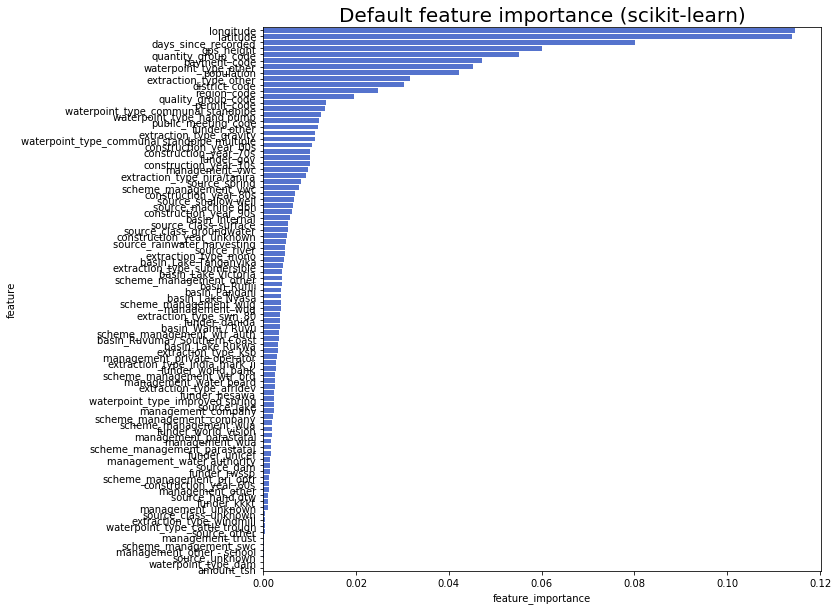

In [67]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

In [68]:
train_df_final_top_imp = OH_train_df[top_30_features].join(y)
X_test_final_top_imp = OH_X_test[top_30_features]

In [69]:
train_df_final_top_imp.shape

(59400, 31)

In [70]:
train_df_selected_features.shape

(59400, 82)

## 8. Exportación del *dataframe* final

In [71]:
train_df_selected_features.to_csv("train_df_final.csv", index=False)
X_test_selected_features.to_csv("X_test_final.csv", index=False)

En la parte tres y última de este trabajo se procede a seleccionar el modelo.
Se han hecho pruebas con diferentes modelos de 30 y 80 variables y los resultados parecen ser estables en todos los modelos. El *set* de 80 variables que obtuvimos después de hacer la regularización con regresión logística cada vez tiene una puntuación más alta, por lo que se ha decidido utilizar los *dataframes* de *selected_features* como el *input* final.

# III. Selección del modelo y entrega
## 1. Preparación de los datos
### 1.1 Importación de librerías y datos

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


pd.set_option('display.max_columns', None)

# Machine Learning

# Árboles de decisión    
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

# Métodos de Ensamble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

# Procesos Gaussianos
from sklearn.gaussian_process import GaussianProcessClassifier
    
# Generalized Linear Model (GLM)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import Perceptron   
    
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
    
# Máquinas de Vectores de Soporte (SVM)
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC

# Análisis Discriminante
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Clasificador Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# Métrica
from sklearn.metrics import accuracy_score, confusion_matrix

# Análisis de Componentes Principales
from sklearn import decomposition

print("Setup Complete")

Setup Complete


In [73]:
train_df_final = pd.read_csv("train_df_final.csv")
X_test_final = pd.read_csv("X_test_final.csv")

In [74]:
X_test_final.shape

(14850, 81)

In [75]:
train_df_final.shape

(59400, 82)

### 1.2 División de datos en *train* y *test*

In [76]:
X = train_df_final.drop("label",axis=1)
y = train_df_final["label"]

In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [78]:
X.isnull().values.any()

False

### 1.3 *Standard Scaling*

Es un método que transforma tus datos de tal manera que su distribución tenga una media de 0 y desviación estándar de 1.
En el caso de datos multivariantes, esto se realiza de manera independiente columna por columna.
Información obtenida de:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [79]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test_final)

### 1.4 Análisis de Componentes Principales (o PCA en inglés)
Creemos que es importante mencionarlo a pesar de que no mejoró la puntuación final, por lo que no fue incluido en el modelo.

In [80]:
pca = decomposition.PCA(.95)

In [81]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
pca.n_components_

54

In [83]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_valid_pca = pca.transform(X_valid)

## 2. Selección del modelo
Comprobamos los diferentes modelos en el *validation set*:

### 2.1 Árboles de decisión

In [84]:
# 1

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_valid)

acc_decision_tree = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_decision_tree

74.66

In [85]:
# 2

extra_tree = DecisionTreeClassifier()
extra_tree.fit(X_train, y_train)
y_pred = extra_tree.predict(X_valid)

acc_extra_tree = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_extra_tree

74.76

### 2.2 Ensamblados

In [86]:
# RandomForest

rfc = RandomForestClassifier(criterion='entropy', n_estimators = 1000,min_samples_split=8,random_state=42,verbose=5)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_valid)

acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_rfc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
build

building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tre

building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tre

building tree 956 of 1000
building tree 957 of 1000
building tree 958 of 1000
building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 12.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.8s finished


80.0

Resultado con PCA y 30 variables: 77.49

Resultado sin PCA y 30 variables: 79.21

Resultado con PCA y 80 variables: 77.53

Resultado sin PCA y 80 variables: 79.71

In [87]:
# GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.075, 
                                max_depth=13,max_features=0.5,
                                min_samples_leaf=14, verbose=5)

GB.fit(X_train, y_train)     
y_pred = GB.predict(X_valid)

acc_GB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_GB

      Iter       Train Loss   Remaining Time 
         1       39683.7191            2.29m
         2       37480.0785            2.37m
         3       35571.8672            2.29m
         4       33959.1176            2.23m
         5       32539.0967            2.19m
         6       31357.2714            2.17m
         7       30285.1017            2.15m
         8       29289.9895            2.12m
         9       28422.4290            2.10m
        10       27618.8230            2.09m
        11       26873.4876            2.06m
        12       26170.6352            2.04m
        13       25587.5078            2.01m
        14       25025.8563            2.00m
        15       24468.0029            1.99m
        16       23973.4207            1.96m
        17       23501.0917            1.95m
        18       23068.0488            1.93m
        19       22678.8553            1.92m
        20       22319.1123            1.91m
        21       21938.8654            1.89m
        2

80.01

Resultado con PCA y 30 variables: 77.21

Resultado sin PCA y 30 variables: 78.95

Resultado sin PCA y 80 variables: 79.19

In [89]:
# LightGBM

LGB = LGBMClassifier(objective='multiclass', learning_rate=0.75, num_iterations=100, 
                     num_leaves=50, random_state=123, max_depth=8)

LGB.fit(X_train, y_train)
y_pred = LGB.predict(X_valid)

acc_LGB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LGB

/Users/gemma/Library/Python/3.7/lib/python/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


78.7

Resultado con PCA y with 30 variables: 76.52

Resultado sin PCA y 30 variables: 77.88

Resultado sin PCA y 80 variables: 78.47

In [90]:
# AdaBoostClassifier

AB = AdaBoostClassifier(n_estimators=100, learning_rate=0.075)
AB.fit(X_train, y_train)     
y_pred = AB.predict(X_valid)

acc_AB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_AB

65.55

In [91]:
# BaggingClassifier

BC = BaggingClassifier(n_estimators=100)
BC.fit(X_train_pca, y_train)     
y_pred = BC.predict(X_valid_pca)

acc_BC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_BC

76.32

Resultado con PCA: 75.98

Resultado sin PCA: 77.33

In [92]:
# XGBoost

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=5)
xgb.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

y_pred = xgb.predict(X_valid)
acc_xgb = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_xgb

76.1

Resultado con PCA y 30 variables: 74.3
    
Resultado sin PCA y 30 variables: 75.45
    
Resultado sin PCA y 80 variables: 76.1

In [93]:
# ExtraTreesClassifier

ETC = ExtraTreesClassifier(n_estimators=100)
ETC.fit(X_train, y_train)     
y_pred = ETC.predict(X_valid)

acc_ETC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_ETC

77.63

### 2.3 *Generalized Linear Models* (GLM)

In [94]:
# LogisticRegression

LG = LogisticRegression(solver="lbfgs", multi_class="multinomial")
LG.fit(X_train, y_train)     
y_pred = LG.predict(X_valid)

acc_LG = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LG

/Library/Python/3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


69.87

Podemos utilizar la Regresión Logística para validar nuestras decisiones de creación de atributos. Esto se puede hacer calculando el coeficiente de los atributos en la función de decisión.
Los coeficientes positivos mejoran la respuesta (aumentan la probabilidad) y los negativos empeoran la respuesta (disminuyen la probabilidad).

In [95]:
coeff_df = pd.DataFrame(train_df_final.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LG.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
80,label,0.231136
55,management_other,0.167525
1,latitude,0.154686
52,extraction_type_submersible,0.110937
68,source_machine dbh,0.106758
...,...,...
15,funder_rwssp,-0.190940
47,extraction_type_india_mark_ii,-0.232149
51,extraction_type_other,-0.264157
7,payment_code,-0.297913


In [96]:
# PassiveAggressiveClassifier

PAC = PassiveAggressiveClassifier()
PAC.fit(X_train, y_train)
y_pred = PAC.predict(X_valid)

acc_PAC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_PAC

60.33

In [97]:
# RidgeClassifierCV

RC = RidgeClassifierCV()
RC.fit(X_train, y_train)
y_pred = RC.predict(X_valid)

acc_RC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_RC

69.82

In [98]:
# Perceptron

P = Perceptron()
P.fit(X_train, y_train)
y_pred = P.predict(X_valid)

acc_P = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_P

62.83

In [99]:
# StochasticGradientDescent

SGD = SGDClassifier(shuffle=True,average=True)
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_valid)

acc_SGD = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_SGD

70.08

### 2.4 KNN

In [100]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

acc_knn = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_knn

75.81

### 2.5 Análisis Discriminante

In [101]:
# LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
LDA.predict(X_valid)

acc_LDA = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LDA

75.81

In [102]:
# QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
QDA.predict(X_valid)

acc_QDA = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_QDA

/Library/Python/3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


75.81

### 2.6 Clasificador *Naive Bayes*

In [103]:
# BernoulliNB

bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train,y_train)
bernoulliNB.predict(X_valid)

acc_bernoulliNB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_bernoulliNB

75.81

In [104]:
# GaussianNB

gaussianNB = GaussianNB()
gaussianNB.fit(X_train,y_train)
gaussianNB.predict(X_valid)

acc_gaussianNB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_gaussianNB

75.81

## 3. Comparación de los resultados de los modelos

A continuación representaremos gráficamente todos los modelos:

In [105]:
models = pd.DataFrame({
    'Model': ['LightGBM','Decision Tree',"Extra Tree",'Random Forest', 'KNN', 'Logistic Regression', 
              'Stochastic Gradient Decent',"XGBoost", "Ada Boost Classifier", 
              "Bagging Classifier", "Passive Agressive Cl", "Ridge","Perceptron",
              'Gradient Boosting Classifier','Extra Trees',
              "LinearDA","QuadraticDA","BernoulliNB","GaussianNB"],
    'Score': [acc_LGB,acc_decision_tree,acc_extra_tree,acc_rfc, acc_knn, acc_LG,
              acc_SGD, acc_xgb, acc_AB, 
              acc_BC, acc_PAC, acc_RC, acc_P,
              acc_GB, acc_ETC,
             acc_LDA, acc_QDA, acc_bernoulliNB, acc_gaussianNB]})
sorted_by_score = models.sort_values(by='Score', ascending=False)

Text(0, 0.5, 'Model')

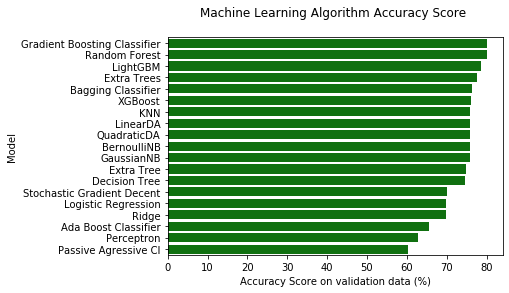

In [106]:
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'g')
plt.title('Exactitud del algoritmo \n')
plt.xlabel('Exactitud en test (%)')
plt.ylabel('Modelo')

Como podemos comprobar, los tres mejores modelos son:

**- *Gradient Boosting Classifier* - 80.01**

**- *Random Forest* - 80.0**

**- *Light GBM* - 78.7**

De ellos, el *Gradient Boosting Classifier* es el mejor y más rápido ya que *Random Forest* da una puntuación un poco peor (de 80.0 comparado a 80.01 del *Gradient Boosting Classifier*).

## 4. Tuneado de modelos y ajuste de parámetros
Se ha decidido ajustar los parámetros basándonos en el tuneado de los tres modelos que acabamos de mencionar.

In [107]:
sc = ss()
X = sc.fit_transform(X)
X_test = sc.transform(X_test_final)

# RandomForest

rfc = RandomForestClassifier(criterion='entropy',min_samples_split=8, n_estimators=1000)

rfc.fit(X, y)     

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
# GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=14,max_features=0.5,min_samples_leaf=14,verbose=5)

GB.fit(X, y)     

      Iter       Train Loss   Remaining Time 
         1       50440.9613            5.07m
         2       48394.9296            4.74m
         3       46570.1300            4.78m
         4       44966.3656            4.75m
         5       43488.8675            4.69m
         6       42093.3751            4.82m
         7       40832.1427            4.75m
         8       39680.7145            4.72m
         9       38618.4786            4.69m
        10       37578.5189            4.63m
        11       36697.9074            4.58m
        12       35835.6099            4.58m
        13       35043.8893            4.52m
        14       34323.2375            4.47m
        15       33581.6816            4.42m
        16       32964.8368            4.38m
        17       32345.8082            4.34m
        18       31767.7088            4.29m
        19       31202.7694            4.25m
        20       30653.3071            4.20m
        21       30180.9600            4.17m
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=14,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=14, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=5,
                           warm_start=False)

In [109]:
# Lightgbm

LGB = LGBMClassifier(objective='multiclass', learning_rate=0.75, num_iterations=100, 
                     num_leaves=40, random_state=123,max_depth=15)

LGB.fit(X, y)

/Users/gemma/Library/Python/3.7/lib/python/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.75, max_depth=15,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_iterations=100, num_leaves=40,
               objective='multiclass', random_state=123, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## 5. Envío
Para finalizar, procedemos a crear el archivo que subiremos a la *web* de *DrivenData* con el formato que se nos indica en *Submission_format.csv*:

In [111]:
submission_df = pd.read_csv("Submission_format.csv")

In [112]:
X_test = sc.transform(X_test_final)
submission_df['status_group']=rfc.predict(X_test)

In [113]:
vals_to_replace = {2:'functional', 1:'functional needs repair', 0:'non functional'}

submission_df.status_group = submission_df.status_group.replace(vals_to_replace)

In [114]:
submission_df.to_csv("submission_Gemma.csv",sep=',', index=False)

## 6. Conclusiones

El objetivo de este proyecto era predecir si una bomba funcionaba o no o si requería de una reparación basándonos en datos que describían la bomba, el pozo, sus alrededores, quién la gestionaba y la fecha.

Hemos iniciado con un Análisis Exploratorio de los Datos. Calculando la exactitud y dividiendo los datos en numéricos y categóricos según su tipología. A continuación hemos identificado los valores faltantes para lidiar con ellos en la fase posterior del preprocesado, buscado valores atípicos y analizado y actuado sobre las diferentes correlaciones existentes entre algunos de los atributos.

En el siguiente paso hemos realizado la limpieza y preprocesado de los datos. Hemos iniciado eliminando atributos que contenían información similar para evitar multicolinealidad. Después hemos tratado los datos faltantes, realizado codificación de tipo ordinal para las que lo requerían y de tipo *One-Hot* para las demás. Finalmente, hemos creado nuevas variables que definieran mejor a la objetivo.

Acabado el preprocesado, hemos seleccionado con Regresión Logística las 80 variables más importantes de un total de 90 columnas. Para finalizar, se han comprobado diversos modelos y mostrado los resultados en un gráfico, obteniendo que los mejores son: 
 
**- Gradient Boosting Classifier - 80.01**

**- Random Forest - 80.0**

**- Light GBM - 78.7**